# Decision Tree Classifier

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('D:/Study/MCA/5thSem/ML/classi-titanic.csv')
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [6]:
df.describe()

,Survived,Pclass,Age
count,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118
std,0.491460,0.838250,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.125000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [7]:
df['Sex'] = [1 if i == 'female' else 0 for i in df['Sex']]
df.head(100)

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
95,0,2,0,21.0
96,0,2,0,32.5
97,1,2,1,32.5
98,0,1,0,54.0


In [8]:
y = df['Survived']
x = df.iloc[:,1:4]
# x = df[['Pclass', 'Sex', 'Age']]
# x.shape
# y.shape
x.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40) 
print(x_train.shape)
print(x_test.shape)

(499, 3)
(215, 3)


In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 10)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(x_train)
print(accuracy_score(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

0.8336673346693386
[[298   7]
 [ 76 118]]


In [14]:
test_pred = model.predict(x_test)
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

0.7581395348837209
[[112   7]
 [ 45  51]]


In [13]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       305
           1       0.94      0.61      0.74       194

    accuracy                           0.83       499
   macro avg       0.87      0.79      0.81       499
weighted avg       0.85      0.83      0.82       499



In [18]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from sklearn.externals.six import StringIO

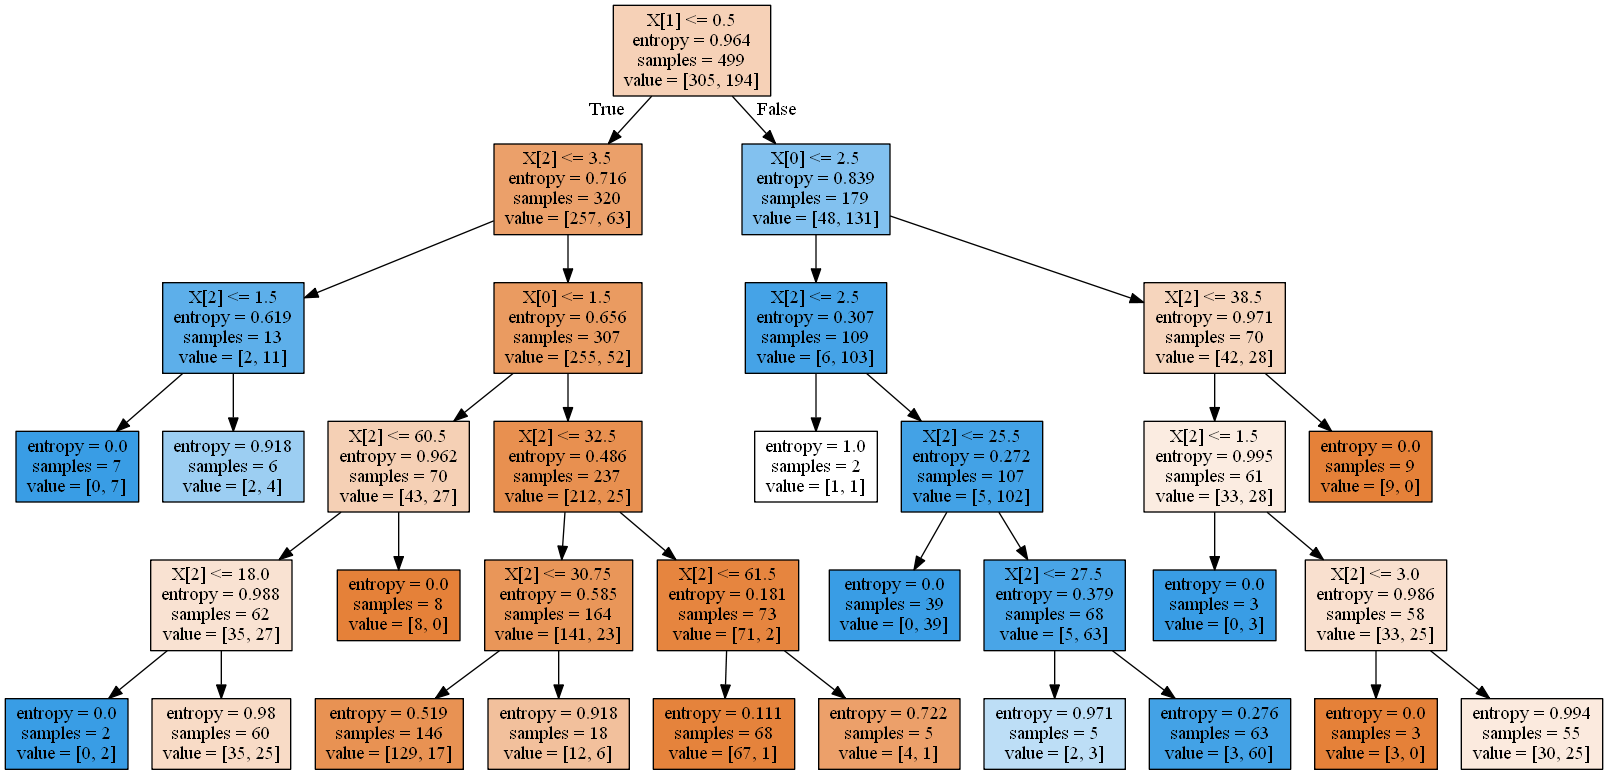

In [20]:
data = StringIO()
export_graphviz(model, out_file = data, filled = True, max_depth = 5)
graph = pydot.graph_from_dot_data(data.getvalue())
Image(graph[0].create_png())